### 와인 품질 분석/예측
기본 통계방법

와인데이터 수집

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

와인데이터 로드

기본 패키지 import

In [1]:
import pandas as pd

준비된 와인데이터 로드하기

In [8]:
red_df=pd.read_csv('./data/winequality-red.csv',sep=';', encoding='utf8')
white_df=pd.read_csv('./data/winequality-white.csv',sep=';',encoding='utf8')

In [9]:
red_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
red_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [11]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
#데이터프레임 형태 조회
red_df.shape

(1599, 12)

In [13]:
white_df.shape

(4898, 12)

와인별로 구분자 type(red,white)추가

In [14]:
red_df.insert(0,column='type',value='red')
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
white_df.insert(0,column='type',value='white')
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


red,white 데이터 결합 --> wine_df

In [17]:
wine_df = pd.concat([red_df,white_df])

In [18]:
wine_df.shape

(6497, 13)

In [19]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
wine_df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [21]:
wine_df.reset_index()

,index,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
wine_df.reset_index(drop=True)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


wine_df를 csv로 저장

In [40]:
wine_df.to_csv('./data/wine.csv',index=False,encoding='utf8')

##index=false 인덱스 없이 저장

In [26]:
wine = pd.read_csv('./data/wine.csv',encoding='utf8')
wine.shape

(6497, 13)

In [27]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,white,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [29]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [30]:
wine.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,white,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
6488,white,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
6489,white,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
6490,white,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
6491,white,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
6492,white,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,white,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [32]:
wine.columns = wine.columns.str.replace(' ','_')
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [35]:
#전체와인 품질등급리스트
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [36]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

와인 그룹별로 확인

In [37]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [38]:
wine.groupby('type')['alcohol'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9
white,4898.0,10.514267,1.230621,8.0,9.5,10.4,11.4,14.2


In [41]:
wine.groupby('type')['alcohol'].agg(['mean','std'])

## std 표준편ㅊㅏ

,mean,std
type,,
red,10.422983,1.065668
white,10.514267,1.230621


In [42]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


t-검정 / 회귀분석

라이브러리 import

In [43]:
from scipy import stats

In [45]:
# statsmodels 패키지 추가
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 5.4 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 kB 7.0 MB/s eta 0:00:00


회귀분석을 위한 statsmodels 패키지 import

In [46]:
from statsmodels.formula.api import ols,glm

In [50]:
red_wine_quality = wine.loc[wine.type == 'red','quality']
red_wine_quality


0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [52]:
white_wine_quality= wine.loc[wine.type == 'white','quality']
white_wine_quality

1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64

In [54]:
#t-검정 (두 그룹 사이의 차이)
stats.ttest_ind(red_wine_quality,white_wine_quality,equal_var=False)

# 등분산이 아니면 equal_var = false 해주기
# 등분산 : 2개 집단 분산이 같음

Ttest_indResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24)

In [59]:
#선형회귀분석
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide '

In [63]:
regre_result = ols(Rformula, data=wine).fit()
regre_result.summary()

# ols 단순선형회귀분석 독립변수1개 종속변수1개
# 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     139.0
Date:                Sun, 07 Aug 2022   Prob (F-statistic):          1.50e-191
Time:                        11:28:46   Log-Likelihood:                -7884.0
No. Observations:                6497   AIC:                         1.578e+04
Df Residuals:                    6489   BIC:                         1.584e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.0340      0.076     92.437      0.000       6.885       7.183
fixed_acidity           -0.0400      0.010     -4.182      0.000      -0.059      -0.021
volatile_acidity        -1.3626      0.079    -17.289      0.000      -1.517      -1.208
citric_acid              0.3547      0.087      4.089      0.000       0.185       0.525
residual_sugar          -0.0046      0.002     -1.886      0.059      -0.009       0.000
chlorides               -3.7629      0.326    -11.550      0.000      -4.402      -3.124
free_sulfur_dioxide      0.0073      0.001      8.805      0.000       0.006       0.009
total_sulfur_dioxide    -0.0049      0.000    -16.832      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       76.147   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.606
Skew:                           0.164   Prob(JB):                     8.64e-23
Kurtosis:                       3.517   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
regre_result = glm(Rformula,data=wine).fit()
regre_result.summary()

#glm:일반형선형회귀분석

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 6497
Model:                            GLM   Df Residuals:                     6489
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                         0.66385
Method:                          IRLS   Log-Likelihood:                -7884.0
Date:                Sun, 07 Aug 2022   Deviance:                       4307.7
Time:                        11:29:40   Pearson chi2:                 4.31e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1391
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.0340      0.076     92.437      0.000       6.885       7.183
fixed_acidity           -0.0400      0.010     -4.182      0.000      -0.059      -0.021
volatile_acidity        -1.3626      0.079    -17.289      0.000      -1.517      -1.208
citric_acid              0.3547      0.087      4.089      0.000       0.185       0.525
residual_sugar          -0.0046      0.002     -1.886      0.059      -0.009       0.000
chlorides               -3.7629      0.326    -11.550      0.000      -4.401      -3.124
free_sulfur_dioxide      0.0073      0.001      8.805      0.000       0.006       0.009
total_sulfur_dioxide    -0.0049      0.000    -16.832      0.000      -0.005      -0.004
========================================================================================
"""

OLS모델로 계산된 회귀분석 결과로 새 샘플 와인에 대한 품질등급 예측

In [66]:
#quality, type 제거하고 컬럼 알파벳순으로 정렬
sample1= wine[wine.columns.difference(['quality','type'])]
sample1=sample1[0:5][:]
sample1

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [67]:
sample1_predict = regre_result.predict(sample1)
sample1_predict

0    5.404293
1    4.998415
2    5.190368
3    5.944176
4    5.404293
dtype: float64

In [68]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [72]:
# 새로운 와인 2개에서 추출된 데이터를 가지고 등급예측
# alcohol	chlorides	citric_acid	density	fixed_acidity	free_sulfur_dioxide	pH

data = {'alcohol':[9.0, 0.88], 'chlorides':[0.055, 0.04], 'citric_acid':[0.3, 0.4], 'density':[0.996, 0.91], 'fixed_acidity':[8.5, 8.1], 'free_sulfur_dioxide':[30.0, 31.0], 'pH':[3.25, 3.01], 'residual_sugar':[6.1, 5.8], 'sulphates':[0.4, 0.35], 'total_sulfur_dioxide':[98.0, 99], 'volatile_acidity':[0.8, 0.5]}


new_sample = pd.DataFrame(data, columns=sample1.columns)
new_sample


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [75]:
new_sample_predict = regre_result.predict(new_sample)

In [76]:
new_sample_predict

0    5.216764
1    5.737258
dtype: float64

예측결과 의사결정

 - 1번 -> 75,000원
 - 2번 -> 24,000원

시각화

와인유형에 따른 품질등급 히스토그램

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


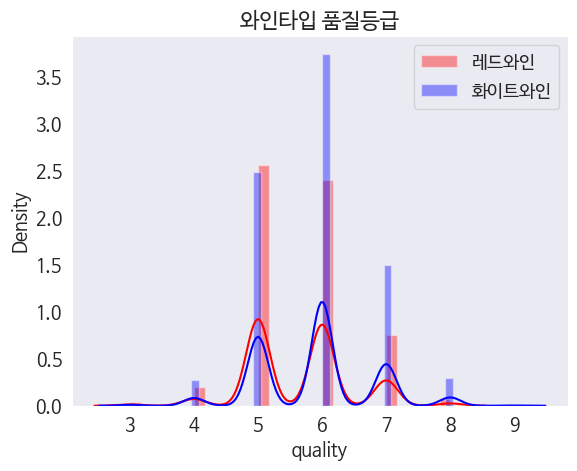

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')
plt.rcParams['font.family']='NanumBarunGothic'
plt.rcParams['font.size']=13
sns.distplot(red_wine_quality, kde=True, color='red', label='레드와인')
sns.distplot(white_wine_quality, kde=True, color='blue', label='화이트와인')
plt.title('와인타입 품질등급')
plt.legend()

plt.show()

선형회귀 분석값 시각화

In [79]:
#패키지 import
import statsmodels.api as sm

others = list(set(wine.columns).difference(set(['quality','fixed_acidity'])))
others

['type',
 'sulphates',
 'chlorides',
 'volatile_acidity',
 'residual_sugar',
 'pH',
 'free_sulfur_dioxide',
 'alcohol',
 'total_sulfur_dioxide',
 'density',
 'citric_acid']

In [81]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False    #음수처리 

eval_env: 1


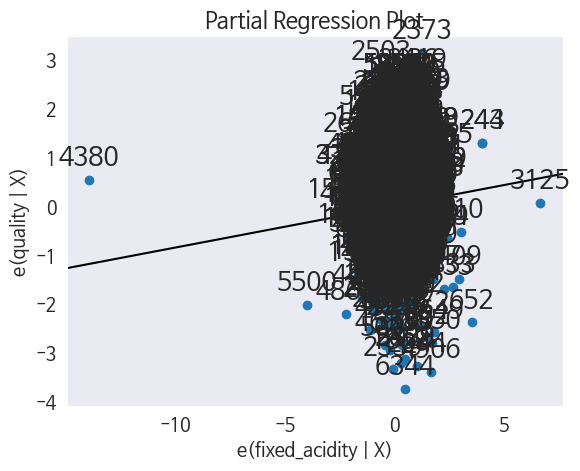

In [82]:
p,resids = sm.graphics.plot_partregress('quality','fixed_acidity',others, data=wine,ret_coords=True)
plt.show()

In [83]:
len(resids[0])

6497

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


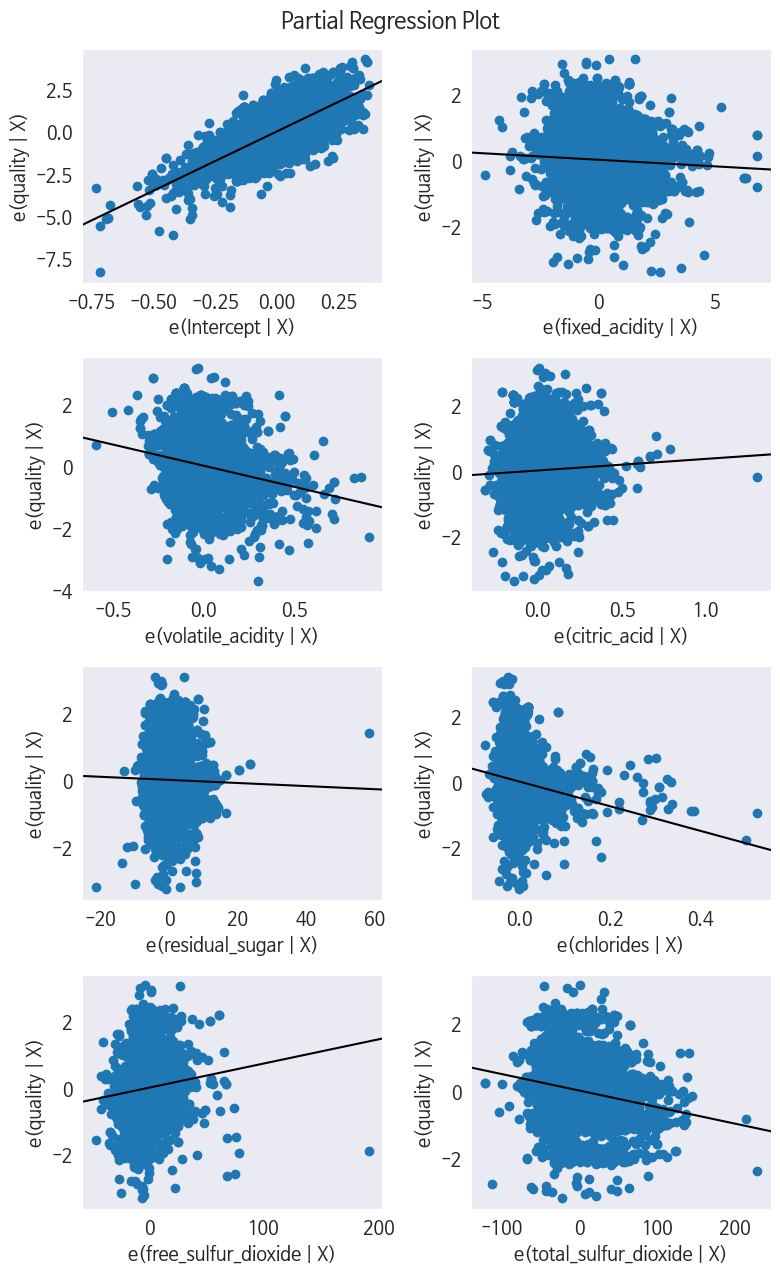

In [84]:
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regre_result, fig=fig)
plt.show()